In [1]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [ ]:
# 주성분 분석
from sklearn.decomposition import PCA

# 주성분 개수 지정
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
# components_: pca 클래스가 찾은 주성분
print(pca.components_.shape)

(50, 10000)


In [4]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n=샘플 개수
    # 샘플 개수를 10으로 나누어 전체 행 개수를 계산->한 줄에 10개씩 이미지를 그린다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수, 아니면 10개
    # figsiz는 ratio에 비례해서 증가
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그림
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

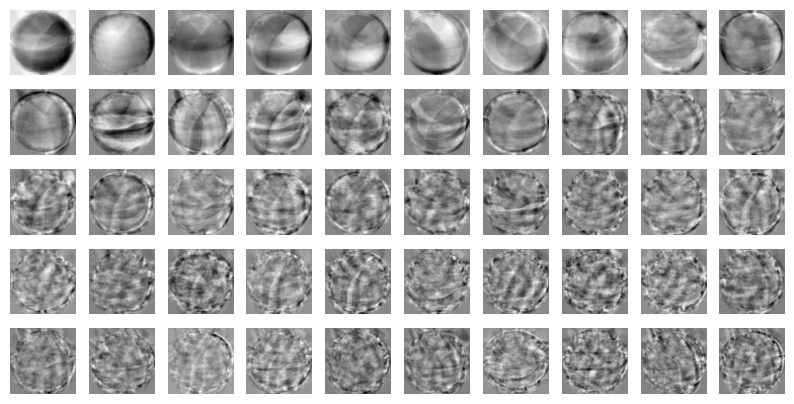

In [6]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [5]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
# 원본 데이터의 차원 줄임
fruits_pca = pca.transform(fruits_2d)

In [8]:
print(fruits_pca.shape)

(300, 50)


In [9]:
# 원본 데이터 복원
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [10]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

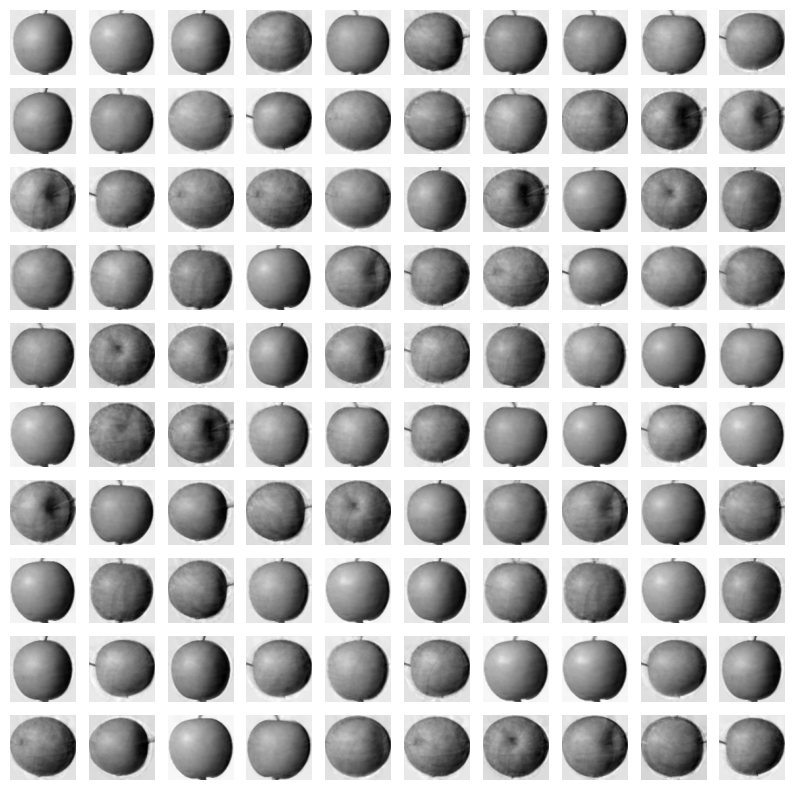

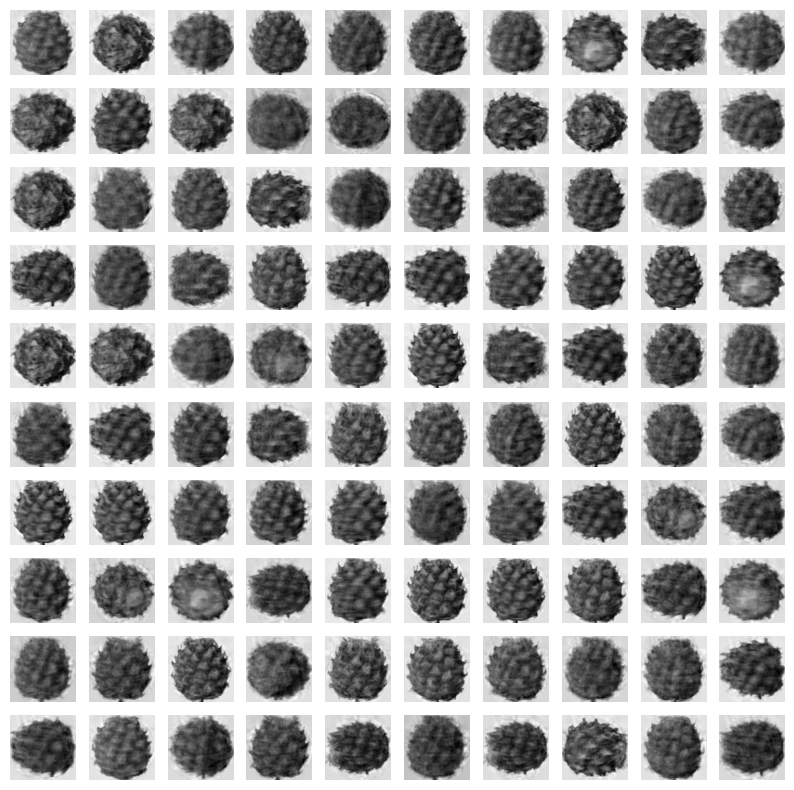

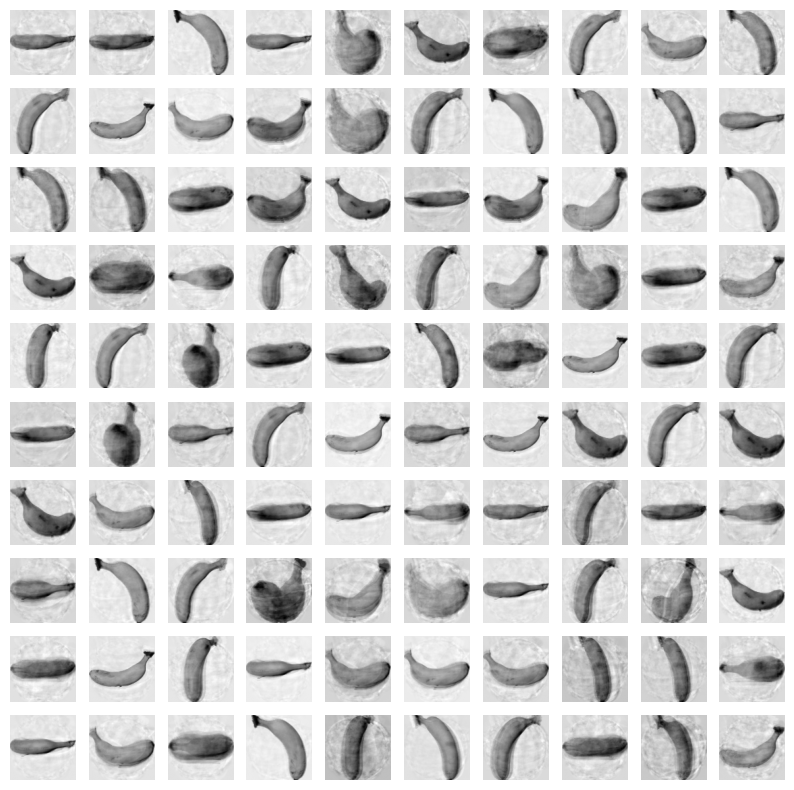

In [11]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [ ]:
# 설명된 분산 비율
print(np.sum(pca.explained_variance_ratio_))

0.9215404028569006


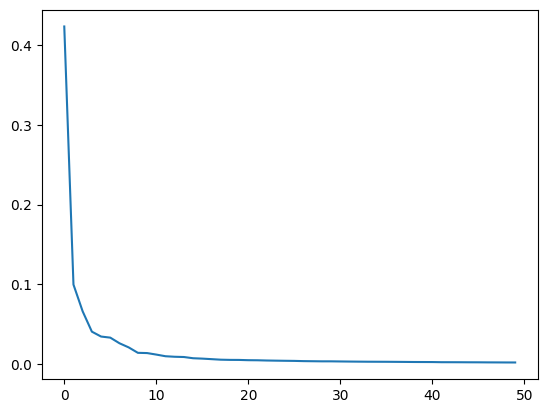

In [13]:
plt.plot(pca.explained_variance_ratio_)

In [14]:
# 로지스틱 회귀와 함께 사용하기
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [15]:
# 지도 학습 모델을 사용하기 위한 타겟 데이터
# 0=사과, 1=파인애플, 2=사과로 가정
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [ ]:
from sklearn.model_selection import cross_validate

# 원본 데이터로 로지스틱 회귀 교차 검증 수행
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.16406574249267578


In [17]:
# pca로 차원 축소된 데이터로 로지스틱 회귀 교차 검증 수행
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.010647106170654296


In [18]:
# 설명된 분산의 50%에 달하는 주성분 찾기
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [19]:
print(pca.n_components_)

2


In [20]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [21]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03732099533081055


c:\Users\lg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\lg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [22]:
# k-평균 알고리즘과과 함께 사용하기
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [23]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


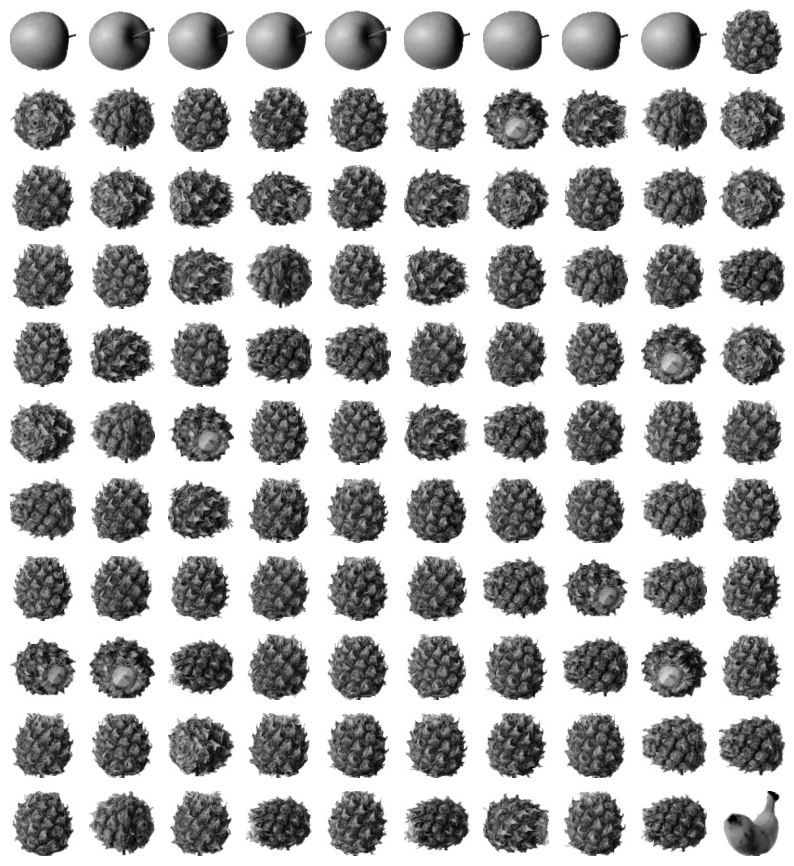

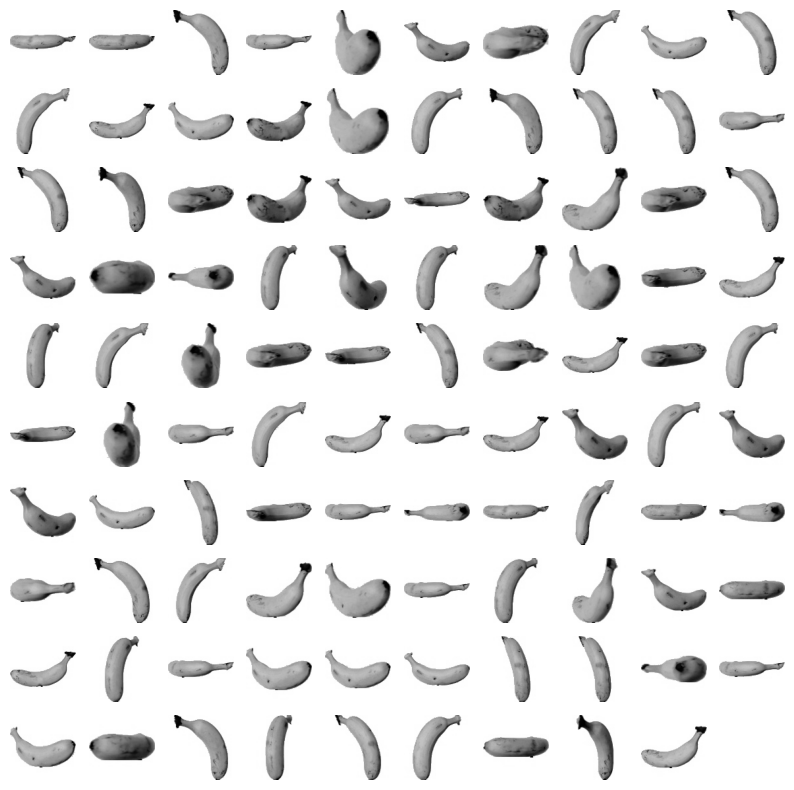

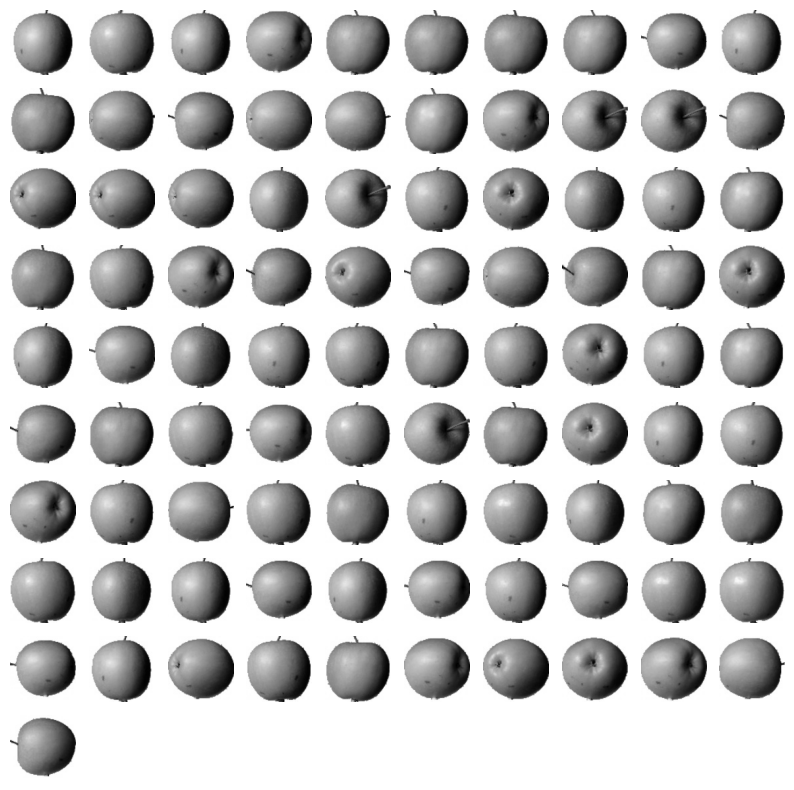

In [24]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

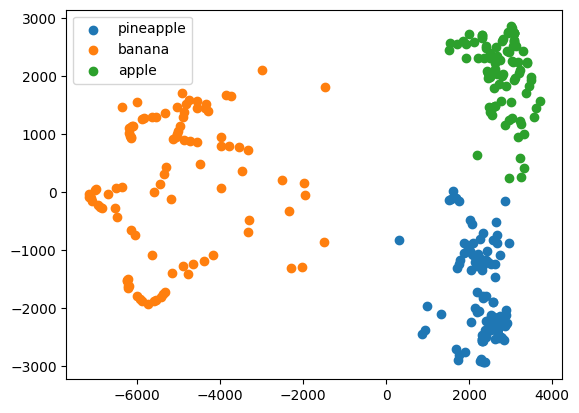

In [25]:
# 클러스터별 산점도
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()